# Twitter

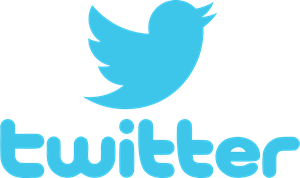

Twitter API allows to fetch live tweets by keyword, or to fetch a 1/6th sample of all twitter traffic.

### Setting up Twitter Credentials

* go to https://apps.twitter.com/
* Apply for a (personal) twitter developer account
* Create a new project
* "Keys and Access Tokens"
* save four keys into `.env` file (or copy `sample.env` to `.env` first)
    * `CONSUMER_KEY` = Consumer Key (API Key)
    * `CONSUMER_SECRET` = Consumer Secret (API Secret)
    * `TWITTER_TOKEN` = Access Token
    * `TWITTER_SECRET` = Access Token Secret

### Getting Started

In [73]:
import os

from dotenv import load_dotenv
load_dotenv()

CONSUMER_KEY = os.environ['CONSUMER_KEY']
CONSUMER_SECRET = os.environ['CONSUMER_SECRET']
TWITTER_TOKEN = os.environ['TWITTER_TOKEN']
TWITTER_SECRET = os.environ['TWITTER_SECRET']

In [74]:
import re

import twitter

# create new twitter stream
stream = twitter.TwitterStream(
    timeout=240,
    heartbeat_timeout=3600,
    auth=twitter.OAuth(TWITTER_TOKEN,
                       TWITTER_SECRET,
                       CONSUMER_KEY,
                       CONSUMER_SECRET))

def get_tweets(terms):
    """
    stream all tweets (within 1/6th quota) indefinitely that contain any of the `terms`.
    
    `statuses.filter` doesn't always return correct matches, so we have to double-check ;)
    """
    # NOTE: using weird syntax instead of '\b' for non-word-boundaries (i.e. starting with '#')
    rex = re.compile(
        r'(?:^|[\W\D]|$)(?:%s)(?:^|[\W\D]|$)' % ('|'.join(re.escape(k) for k in terms),),
        flags=re.I)
    track = ','.join(terms)
    
    for tweet in stream.statuses.filter(track=track):
        text = tweet.get('extended_tweet', {}).get('full_text') or tweet.get('text')
        if tweet.get('lang') == 'en' and rex.search(text):
            yield tweet

### Tweet Filtering

We are looking for all current live tweets that contain the following keywords.
Let's see how long it will take to fetch 10 live tweets?

In [75]:
from itertools import islice

from tqdm import tqdm_notebook

terms = [
    '#BigData',
    '#MachineLearning',
    'machine learning',
    'deep learning',
    'artificial intelligence',
    'data science',
    '#ml',
    '#deeplearning',
    '#datascience',
    '#machinelearning',
    'natural language processing'
]

    
res = tqdm_notebook(get_tweets(terms))
res = list(islice(res, 10))

# Note: figure out how to close stream after use to prevent "Enhance your Calm" error
del stream

### Tweet Structure

A tweet contains a lot of data and metadata:

In [76]:
import json

print(json.dumps(res[0], indent=4))

{
    "created_at": "Sat Oct 12 10:58:00 +0000 2019",
    "id": 1182973687705808896,
    "id_str": "1182973687705808896",
    "text": "An achievable view of artificial intelligence - https://t.co/rCvLnVp781 https://t.co/Q5vmTDcs8E",
    "source": "<a href=\"https://promorepublic.com\" rel=\"nofollow\">PromoRepublic</a>",
    "truncated": false,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "in_reply_to_screen_name": null,
    "user": {
        "id": 1934016607,
        "id_str": "1934016607",
        "name": "Network Explosion",
        "screen_name": "networkexplode",
        "location": "Johannesburg",
        "url": "http://www.networkexplosion.co.za",
        "description": "Digital media coaching and hosting of digital media platforms - we make time for you",
        "translator_type": "none",
        "protected": false,
        "verified": false,
        "followers_count": 274,
 

### Matched Tweets

Let's look at some of the tweet texts we have captured:

In [77]:
import json
import pandas as pd
pd.options.display.max_colwidth = 280


def prep_tweets(tweets):
    """
    extract fields of interests from tweets
    """
    for tweet in tweets:
        yield {
            'text': tweet.get('extended_tweet', {}).get('full_text') or tweet.get('text'),
            'author': tweet.get('user', {}).get('screen_name'),
            #'lang': tweet.get('lang'),
            # 'urls': [x.get('expanded_url') or x.get('url') for x in tweet.get('entities', {}).get('urls')]
        }

        
prepped = list(prep_tweets(res))
pd.DataFrame(prepped)

author  \
0   networkexplode   
1     JGAvatar1157   
2     TransitQuote   
3     FindNerdJobs   
4  BentleyFranklin   
5      John_ITJobs   
6         cortizpr   
7    BigDataBatman   
8        DeSaInTeD   
9      dheeraj1620   

                                                                                                                                                                                                                                                           text  
0                                                                                                                                                               An achievable view of artificial intelligence - https://t.co/rCvLnVp781 https://t.co/Q5vmTDcs8E  
1                                                                                                               RT @agoeskoes: The ecosystem of #Industry40 \n#by @alison_iot\n\n#infographic #machinelearning #IIoT  #4IR #DigitalTransformation #Tech #infos…  
2                                                                                                                                                                                 How to Put Data Science to Work for Your Supply Chain https://t.co/RUJAjSQ1Zf  
3                                                                                                ☀ Hiring: #PL/ SQL Developer (F2F required)\n#Austin #BigData #DBA #SQL #techjobs #devjobs\nApply Now &gt;&gt; https://t.co/XfFFPNOjnf https://t.co/1YXjhc6gyj  
4                                                                                                              RT @pascal_bornet: Harvard shows how #MachineLearning can be applied to #Architecture design\n https://t.co/SoIrfWcoag\n\n#AI #ML\n@alvinfoo @F…  
5                                  Staff Data Scientist job opening in #Atlanta, GA #techjobs Role Summary: The Staff Data Scientist in Power Digital Data Science &amp; Analytics team will be responsible for delivering machine... - https://t.co/5MrLn82sX3  
6                                                                                                                RT @darshan_h_sheth: New generation of #prosthetics can read mind using #machineLearning and #EMG\n@pascal_bornet @darshan_h_sheth\n@alvinfoo…  
7                                                                                                                                                        Learn Batman Testing with NoSQL using Cassandra and HBase https://t.co/wr35cGo5Zy #machinelearning #ad  
8                                                                                                    Valley Insights Recaps First Year Of Artificial Intelligence Insights - https://t.co/Hn08dGOeHE https://t.co/U1YOD3PU4j dlvrit #AI #ArtificialIntelligence  
9  From @F1 to @MotoGP, the adoption of #AI, #ML, #generativedesign and #3Dprinting are transforming #manufacturing in motorsport. Read more from Autodesk’s Brent Pittman in @EurekaMagazine: https://t.co/ln99EFdAoR #AutodeskPartner https://t.co/ArerRAWn4P

### Hashtags

Find which hashtags occur most frequently in our matched tweets

In [80]:
import gzip
import json
from collections import Counter
import pandas as pd


def get_tweets_from_file():
    """
    load matched tweets from file
    """
    with gzip.open('data/machine_learning-2018-09-26.jl.gz', 'rt') as fhandle:
        for line in fhandle:
            yield json.loads(line)

            
def hashtags(elt):
    """
    get all hashtags from deep within tweet (extended_tweet, retweets, etc.)
    """
    if isinstance(elt, list):
        for x in elt:
            yield from hashtags(x)
    elif isinstance(elt, dict):
        if 'hashtags' in elt:
            yield [x.get('text').lower() for x in elt['hashtags']]
        for v in elt.values():
            yield from hashtags(v)
            
            
tweets = list(islice(get_tweets_from_file(), 1000))
hashtags_per_tweet = [sum(hashtags(tweet), []) for tweet in tweets]
all_hashtags = sum(hashtags_per_tweet, []) 
ctr = Counter(all_hashtags)
pd.DataFrame(ctr.most_common(30))

0    1
0                       ai  771
1                  bigdata  555
2          machinelearning  532
3                      iot  344
4              datascience  339
5             deeplearning  294
6                       ml  198
7   artificialintelligence  169
8                  fintech  165
9               blockchain  138
10                    tech  119
11                robotics   86
12                    iiot   84
13                  robots   82
14               analytics   65
15                     nlp   63
16               insurtech   58
17                      dl   53
18   digitaltransformation   52
19                    data   52
20                    jobs   52
21              innovation   51
22                  hiring   49
23                 bitcoin   47
24          cryptocurrency   47
25                 careers   46
26              technology   45
27             infographic   43
28           cybersecurity   41
29            infographics   40

### Leveraging Twitter Data

Based on the Twitter data we can generate many potential use cases:

* [Matched Tweets per Day](https://fluquid.com:5000/twitter)
* [DeepMoji](https://github.com/bfelbo/DeepMoji)
* Find job offerings
* Build a social graph of tweeters
* Engage with trending tweets, conversations in your niche
* Build live language models, sentiment analysis i.e. for elections
* etc.

In [92]:
terms = [
    '😂', '😭', '😍', '❤️', '👉', '💜', '💕', '😊', '🤔', '🙏', '😀', '😎', '🎉', '😊', '💩'
]

stream = twitter.TwitterStream(
    timeout=240,
    heartbeat_timeout=3600,
    auth=twitter.OAuth(TWITTER_TOKEN,
                       TWITTER_SECRET,
                       CONSUMER_KEY,
                       CONSUMER_SECRET))

res = tqdm_notebook(get_tweets(terms))
res = list(islice(res, 100))

# Note: figure out how to close stream after use to prevent "Enhance your Calm" error
del stream

In [93]:
import re

from emoji.core import get_emoji_regexp

RE_EMOJI = get_emoji_regexp()

def prep_tweets(tweets):
    """
    extract fields of interests from tweets
    """
    emojis = []
    for tweet in tweets:
        text = tweet.get('extended_tweet', {}).get('full_text') or tweet.get('text')
        yield {
            'text': RE_EMOJI.sub('', text),
            'emojis': list(set(RE_EMOJI.findall(text)))
        }
        
prepped = list(prep_tweets(res))
pd.DataFrame(prepped)

emojis  \
0                                    [😭]   
1                                    [🤔]   
2                                    [😭]   
3                                    [😊]   
4                                    [😂]   
5                                    [😭]   
6                                    [💕]   
7                                    [💜]   
8                                    [😂]   
9                                    [💜]   
10                                   [😂]   
11                                   [😊]   
12                                   [😊]   
13                                   [❤]   
14                          [😊, ♥, 💪, 🔥]   
15                                   [😍]   
16                                   [😊]   
17                                   [😂]   
18                                   [😂]   
19                             [👉, 📸, 💙]   
20                                   [😭]   
21                                   [😭]   
22                                [💕, ☺]   
23                                   [😭]   
24                                [😍, 🔥]   
25                                   [🎉]   
26                                   [💕]   
27                                   [😭]   
28                                   [😭]   
29                                   [😭]   
..                                   ...   
70                                   [😂]   
71                                   [😎]   
72                                   [😂]   
73                                   [🙏]   
74                                   [😭]   
75                                   [💕]   
76                                   [😍]   
77                                [😭, 🤧]   
78                                   [🤔]   
79                                [😭, 🙏]   
80                                [😂, 💀]   
81                                   [😂]   
82                                   [😂]   
83  [🤠, 😂, 😡, 🤩, ❤, 😍, 🤪, 🔪, 🥺, 😳, 🤡, 😎]   
84                                   [🙏]   
85                                   [💜]   
86                                   [💜]   
87                 [💕, 🤩, ❤, 😍, 💪, 🔥, 🔉]   
88                                   [😍]   
89                                   [❤]   
90                                   [❤]   
91                                   [😍]   
92                                [😞, 🤔]   
93                                   [😭]   
94                                   [😭]   
95                                   [❤]   
96                 [💕, 🤩, ❤, 😍, 💪, 🔥, 🔉]   
97                       [🚶, 💗, 😂, 😁, 🙏]   
98                                   [😭]   
99                                   [😍]   

                                                                                                                                                                                                                                                                                 text  
0                                                                                                                                                                                                               RT @armntingzs: This bitch is my inspiration  https://t.co/WRXzyg5GKe  
1                                                                                                                                                                                          RT @rgpoulussen: There's a "German" telling all what the plan is.  https://t.co/YCxoJXM3SA  
2                                                                                                                                                                                                                      RT @jihoonfullsun: MUST U MAKE ME CRY  https://t.co/pNJFjRfqql  
3                                                                                                                                                          @amalia122015 @HeyRhett Maam y

In [94]:
from collections import Counter
together = sum([p['emojis'] for p in prepped], [])
Counter(together).most_common(15)


[('😭', 27),
 ('😂', 24),
 ('😍', 16),
 ('❤', 10),
 ('😊', 8),
 ('💕', 7),
 ('🔥', 6),
 ('💜', 5),
 ('🙏', 5),
 ('🤔', 3),
 ('♥', 3),
 ('💪', 3),
 ('😎', 3),
 ('\U0001f929', 3),
 ('👉', 2)]